# Добрый вечер ребята
Сегодня я хочу вспомнить все основные аспекты, которые я прошел ранее, а заодно пройдусь по новой теории, на которую раньше не обращал внимание.
Опустим Линейную регрессию, ей мы и так очень много занимались. Кроме линейной, существует еще логистическая регрессия, и сегодня мы изучим именно ее.

---

Для начала загрузим все библиотеки, которые будем использовать

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
#Прочитаем датасет, который я нашел в недрах интернета
data=pd.read_csv('data.csv')
#Давайте удалим пустой столбец, раз уж он нам не нужен
data.drop(['Unnamed: 32','id'], axis=1, inplace=True) #inplace=True позволяет изменить оригинал датасета, если бы мы не написали, то изменялась бы копия. Поэтому с этим параметром можно не писать data=data.drop...
data 

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
# Напишем небольшой код чтобы быстро скопировать названия столбцов в нужном нам формате
i=0
for name in data.columns:
    print(f"* {name} - ")
    i+=1

* diagnosis - 
* radius_mean - 
* texture_mean - 
* perimeter_mean - 
* area_mean - 
* smoothness_mean - 
* compactness_mean - 
* concavity_mean - 
* concave points_mean - 
* symmetry_mean - 
* fractal_dimension_mean - 
* radius_se - 
* texture_se - 
* perimeter_se - 
* area_se - 
* smoothness_se - 
* compactness_se - 
* concavity_se - 
* concave points_se - 
* symmetry_se - 
* fractal_dimension_se - 
* radius_worst - 
* texture_worst - 
* perimeter_worst - 
* area_worst - 
* smoothness_worst - 
* compactness_worst - 
* concavity_worst - 
* concave points_worst - 
* symmetry_worst - 
* fractal_dimension_worst - 


Давайте рассмотрим эту таблицу и вообще поймем, каике столбцы что обозначают.
* id - id клиента
* diagnosis - Диагноз (M = злокачественный, B = доброкачественный)
* radius_mean - радиус (среднее значение расстояний от центра до точек по периметру)
* texture_mean - текстура (стандартное отклонение значений шкалы серого)
* perimeter_mean - периметр
* area_mean - область
* smoothness_mean - плавность (локальное изменение длины радиуса)
* compactness_mean - компактность (периметр^2 / площадь - 1,0)
* concavity_mean - вогнутость (выраженность вогнутых участков контура)
* concave points_mean - точки вогнутости (количество вогнутых участков контура)
* symmetry_mean - симметрия
* fractal_dimension_mean - фрактальное измерение ("приближение береговой линии" - 1)
* radius_se - стандартная ошибка для среднего значения расстояний от центра до точек по периметру
* texture_se - стандартная ошибка для стандартного отклонения значений шкалы серого
* perimeter_se - стандартная ошибка для периметра
* area_se - *по аналогии*
* smoothness_se - 
* compactness_se - 
* concavity_se - 
* concave points_se - 
* symmetry_se - 
* fractal_dimension_se - 
* radius_worst - "наихудшее" или наибольшее среднее значение для среднего расстояния от центра до точек по периметру
* texture_worst - "наихудшее" или наибольшее среднее значение для стандартного отклонения значений по шкале серого
* perimeter_worst - *по аналогии*
* area_worst - 
* smoothness_worst - "наихудшее" или наибольшее среднее значение для локального изменения длин радиусов
* compactness_worst - *по аналогии*
* concavity_worst - 
* concave points_worst - 
* symmetry_worst - 
* fractal_dimension_worst - 

In [4]:
print(data.diagnosis)
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
data.diagnosis

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [5]:
#Теперь давйте разделим наши данные для более удобной обработки
print(data.diagnosis.values) #позволяет из датафрейма перейти в список
y=data.diagnosis.values
#y=data.diagnosis
x_data=data.drop(['diagnosis'], axis=1)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

## Min-Max Нормализация
Существует метод, который изменяет масштаб значений, чтобы они находились в диапазоне от 0 до 1. Кроме того, данные в конечном итоге имеют меньшие стандартные отклонения, что может подавить эффект выбросов.
Формула Min-Man Нормализации выглядит следующим образом:
$$\begin{array}{l}
{x_{i,norm}} = \frac{{{x_i} - {x_{\min }}}}{{{x_{\max }} - {x_{\min }}}}\\

\end{array}$$
${x_i}\, - \ i-й \ непреобразованный \ элемент\\
{x_{\min }}\, - \ наименьший \ элемент\\
{x_{\max }}\, - \ наибольший \ элемент$

In [6]:
#функции np.min и np.max вовращают мин и макс значения датафрейма
np.min(x_data, axis=0)


radius_mean                  6.981000
texture_mean                 9.710000
perimeter_mean              43.790000
area_mean                  143.500000
smoothness_mean              0.052630
compactness_mean             0.019380
concavity_mean               0.000000
concave points_mean          0.000000
symmetry_mean                0.106000
fractal_dimension_mean       0.049960
radius_se                    0.111500
texture_se                   0.360200
perimeter_se                 0.757000
area_se                      6.802000
smoothness_se                0.001713
compactness_se               0.002252
concavity_se                 0.000000
concave points_se            0.000000
symmetry_se                  0.007882
fractal_dimension_se         0.000895
radius_worst                 7.930000
texture_worst               12.020000
perimeter_worst             50.410000
area_worst                 185.200000
smoothness_worst             0.071170
compactness_worst            0.027290
concavity_wo

In [7]:
#Нормализация
x=((x_data-np.min(x_data, axis=0))/(np.max(x_data,axis=0)-np.min(x_data, axis=0))).values
x

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.15, random_state=42)
x_train=x_train.T
x_test=x_test.T
y_train=y_train.T
y_test=y_test.T
print('Размеры разделенных массивов')
print(f"x_train: {x_train.shape}\nx_test: {x_test.shape}\ny_train: {y_train.shape}\ny_test:{y_test.shape}\n")

Размеры разделенных массивов
x_train: (30, 483)
x_test: (30, 86)
y_train: (483,)
y_test:(86,)



In [9]:
# В дальнейшем понадобится
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

a,b=initialize_weights_and_bias(4096)
print(a.shape)
print(a)

(4096, 1)
[[0.01]
 [0.01]
 [0.01]
 ...
 [0.01]
 [0.01]
 [0.01]]


In [10]:
#%% Сигмоида
# Нужна для решения логистического уравнения, приводит к сглаживанию некоторых значений, и для оценки вероятности событий
#z = np.dot(w.T,x_train)+b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head
#y_head = sigmoid(5)

## Оценка работы машинного обучения
    Оценить — означает указать количественно, хорошо или плохо сеть решает поставленные ей задачи. Для этого строится функция оценки. Она, как правило, явно зависит от выходных сигналов сети и неявно (через функционирование) — от всех её параметров. Простейший и самый распространённый пример оценки — сумма квадратов расстояний от выходных сигналов сети до их требуемых значений:

 $$H = \frac{1}{2} \cdot \sum\limits_r {{{\left( {Z(r) - {Z^ * }(r)} \right)}^2}} $$
 Метод наименьших квадратов далеко не всегда является лучшим выбором оценки. Тщательное конструирование функции оценки позволяет на порядок повысить эффективность обучения сети, а также получать дополнительную информацию — «уровень уверенности» сети в даваемом ответе. Именно поэтому были придуманы другие способы оценки. Мы же воспользуемся градиентным спуском, однако коэффициенты для спуска будут меняться после каждого шага, поэтому вы в любом случае найдем минимум. Единственной проблемой является нахождение ошибочного минимума, который называется просто **локальным** минимумом. 

 Так как у нас будет двоичная классификация (злокачественная или доброкачественная опухоль), то нам нужно будет получить значения в форме вероятностей.
 Это нужно нам для того, чтобы применить функцию активации. К примеру, если вероятность злокачественной будет >50%, то мы скажем Да, а если <50%, то скажем Нет. 
 Но как это реализовать в масштабах машинного обучения? Нам же нужно, чтобы машина училась на своих же ошибках.
 Для этого мы будет брать Сигмоиду от наших данных. ![Фото](https://avatars.dzeninfra.ru/get-zen_doc/1368767/pub_60771a76c3445e46f5419930_60771a7b50d6720e3438dbba/scale_2400)

 Ну и также в случае бинарной классификации(Собака или кошка = 0 или 1) функция Потерь будет иметь вид
 $$CE =  - \left( {y\log (p) + (1 - y)\log (1 - p)} \right)$$

In [11]:
#forward and backward propagation
def forward_backward_propagation(w,b,x_train,y_train):
    #forward pass
    
    z=np.dot(w.T,x_train)+b #Перемножим 
    # print(x_train.shape)
    # print(w.T.shape)
    # print(z.shape)
    y_head=sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head) #функция потерь
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [12]:
#%%# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [13]:
#%%  # prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction
# predict(parameters["weight"],parameters["bias"],x_test)

Cost after iteration 0: 0.692836
Cost after iteration 10: 0.498576
Cost after iteration 20: 0.404996
Cost after iteration 30: 0.350059
Cost after iteration 40: 0.313747
Cost after iteration 50: 0.287767
Cost after iteration 60: 0.268114
Cost after iteration 70: 0.252627
Cost after iteration 80: 0.240036
Cost after iteration 90: 0.229543


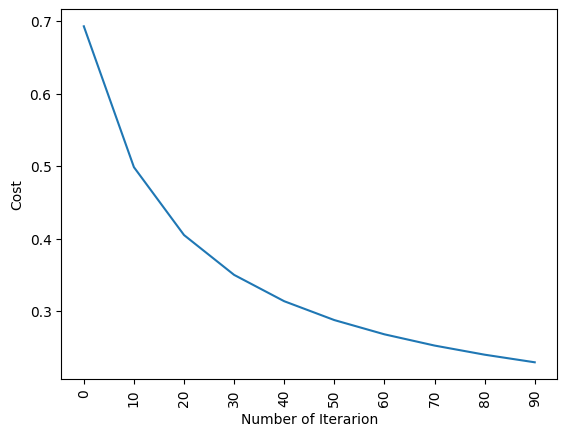

train accuracy: 94.40993788819875 %
test accuracy: 94.18604651162791 %


In [14]:
# %%
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 1, num_iterations = 100) 

А теперь сделаем то же самое, но с использованием встроенной функции от sklearn)

In [15]:
# sklearn
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 51,max_iter= 150)
print(f"test accuracy: {logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)} ")
print(f"train accuracy: {logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)} ")
logreg.fit(x_train.T, y_train.T)

test accuracy: 0.9767441860465116 
train accuracy: 0.968944099378882 


LogisticRegression(max_iter=150, random_state=51)

In [35]:
#Давайте проверим работоспособность машины на каком-нибудь примере.
def predicting(test,n):
    print('\n--------------------------------------')
    print(f"Настоящий результат:{y[n]}")
    Prediction=logreg.predict(test)
    print(f'Машинный результат:{Prediction}\n----------------------\n')
    call='не '
    call2='доброкачественная'
    if Prediction[0]:
        call=''
        call2='злокачественная'
    print(f"Поздравляем вас, вы {call}больны. Ваша опухоль {call2}!")

In [36]:
n=500
for n in range(497,500):
    test=[x[n]]
    predicting(test,n)



--------------------------------------
Настоящий результат:0
Машинный результат:[0]
----------------------

Поздравляем вас, вы не больны. Ваша опухоль доброкачественная!

--------------------------------------
Настоящий результат:1
Машинный результат:[1]
----------------------

Поздравляем вас, вы больны. Ваша опухоль злокачественная!

--------------------------------------
Настоящий результат:1
Машинный результат:[1]
----------------------

Поздравляем вас, вы больны. Ваша опухоль злокачественная!


## Недостатки
1. Машина может и переобучиться, за этим также нужно следить
2. Машина воспринимает данные только в нормализованном виде, а значит, нужно постоянно хранить значения для тренировки (train), потому что иначе при добавлении 